____________________________________________________________________

# NI-KOP

<p style='text-align: right;'> Author: Mykyta Boiko </p>
<p style='text-align: right;'> CTU login: boikomyk </p>

## Report #2

____________________________________________________________________

## 1. Popis alogritmu

Dále budou následovat krátké popisy každého použitého algoritmu v experementech:

- Brand & Bounds
- Dynamic programming (decomposition by weight)
- Dynamic programming (decomposition by price)
- Greedy
- Redux
- FPTAS

Kazdy algoritmus je již do detailů popsaný a okomentovaný přímo v kódu. Tady budou uvedené pouze krátké popisy.

### 1.1 Branch & Bounds

Tento algoritm už je dobře popsaný v předchozím reportu (a komentáře přímo v kódu).

### 1.2 Dynamic programming

Hlavní myšlenka **Dynamic Programming** v případě problémů batohu je použití tabulky kam se ukládají řešení všech podproblému (všechny možné hodnoty cen/vah, v závislosti na zvoleném typu dekompozici, které mohou vzninkout při přidání věci do batohu). Pokud v průběhu řešení znovu narážíme na již řešeny podproblém, tak stačí vzít řešení v tabulce, aniž byste podproblém museli znovu řešit.

Je třeba poznamenat, že nalezené řešení je vždy optimální, neboť algoritmus vytvoří tabulku pro celý strom všech možných výsledků. Stejně je nutné říct, že algoritmus je pseudopolynomiální, jelikož doba běhu je **O(NW)** nebo **O(N*sum_of_all_items_prices)** pro neomezený problém batohu s **N** položkami a batohem velikosti **W** (**W** však není polynomiální vůči délce vstupu). Což už klidně umožňuje Nám odpovědět na jeden z kladených dotazů, že složitost algoritmu závisí na parametru, který nemá nic společného s velikostí.

#### 1.2.1 Decomposition by weight

V případě dokompozice podle váhy tabulka má nalsedujci parametry:
- počet řádku je stejný jako celkový počet věci daný pro danou instanci problémů

- počet sloupců je rovný kapacitě/nosnosti batohu (maximlani povolena váha)

Jinak řečeno, to znamená, že každý řádek reprezentuje řešení problémů pro počet předmětů, který se rovná indexu řádku. Stejně tak sloupce reprezentují všechny možné výsledky vah (pro všechny kombinace všech správných řešení). Což vede na to, že buňka[i,j] reprezentuje cenu takové kombinace. Finální výsledek je uloženy v posledním řádku (maximální hodnota v posledním řádku).



Tabulka se staví následovně: (Zkrácený kód..)
```python
for item_index in range(items_indexes_rows_cnt + 1):
    for capacity_index in range(capacity_columns_cnt + 1):
        ...
        #  if weight of current item is lower or equal to the remaining knapsack's capacity then
        if current_item.weight <= capacity_index:
            # return the maximum of two cases:
            # - current item included or
            # - not included
            memory_table[item_index][capacity_index] = max(
                current_item.price + memory_table[item_index - 1][capacity_index - current_item.weight],
                memory_table[item_index - 1][capacity_index]
            )
        # otherwise current proceeding item cannot be included
        else:
            memory_table[item_index][capacity_index] = memory_table[item_index - 1][capacity_index]
```

#### 1.2.2 Decomposition by price

V podstatě přístup k řešení je skoro ten samy, avšak je nutné poznamenat další důležité rozdíly.
Tabulka má nalsedujci parametry:

- počet řádku je stejný jako celkový počet věci daný pro danou instanci problémů

- počet sloupců je rovný sumě cen všech věci daně instance problému.

Finální výsledek je zase uloženy v posledním řádku (maximální hodnota, avšak je nutné aby byla splněna podmínka: *hodnota_buňky <= knapsack_capacity*)

Tabulka se staví zase následovně: (Zkrácený kód..):
```python
for knapsack_current_price in range(2, items_total_sum + 1):
    for item_index in range(1, items_total_count + 1):
        ...

        index = knapsack_current_price - current_item.price
        if index < 0:
            # if index is negative, the weight remains the same
            memory_table[knapsack_current_price][item_index] = previous_weight
        else:
            # otherwise
            # resolve weight to add (zero or weight of current proceeding item)
            weight_to_add = current_item.weight if memory_table[index][item_index - 1] != infinity else 0
            # W(c, i) = min(W(c, i - 1), W(c, i - 1 ) + w_c) for any c > 0
            memory_table[knapsack_current_price][item_index] = min(previous_weight, memory_table[index][item_index - 1] + weight_to_add)
```

### 1.3 Greedy

Hlavni myslenka **Greedy** pristupu k reseni je super jednoducha: seřadit všechny veci sestupně podle jejich poměru: $$ poměr = \frac{cena}{vaha} $$

a přidávat veci postupně, dokud není batoh plný. 

Je nejrychlejší metodou pro řešení batohu, její složitost závisí na složitosti použitého řazení (zpravidla je **O(nlogn)**).

Ale není zandá 100% garance, že nalezené řešení bude optimální, neboť třeba pouze jedna věc s maximální cenou a zároveň vahou může být řešením, ale kvůli nízkému poměru nejspíš bude ignorována algoritmem. (Tento případ řeší modifikace **Redux**, která bude popsána trošku dál)

U tohoto algoritmu je nutné zavést další pojem: **Relativní chyba**, která se vypočítá následovně:
$$
    chyba = \frac{|cena_{řešení} - cena_{reference}|}{max(cena_{řešení}, cena_{reference})}
$$

### 1.4 Redux

**Redux** je vylepšením(/modifikace) předchozí heuristiky (vlastně řeší ten případ s jednou věci s maximální cenou a vahou).

Nejdřív pro danou instanci nalezneme řešení popsanou **Greedy** heuristikou. Pak vytvoříme další batoh s jednou nejrdazsi věci a porovnáme obě řešení. Lepší z těchto řešení (s větší cenou nebo stejnou cenou ale menší vahou) je pak řešením finálním.

### 1.5 FPTAS

Hlavní myšlenka algoritmu, v kominaci s **Dynamic programming s dekompozici podle ceny**, je snížení celkového prostoru pro prohledávání za předpokladu toho, že dovolujeme algoritmu dělat chyby.

Zavádíme maximální relativní chybu pro algoritmus a zmenšujeme sumu cen všech věci daného problémů, tím vlastně zmenšujeme velikost tabulky (kde, je nutné připomenout, počet sloupců je rovný sumě cen všech věci). Což vede na to, že suboptimální řešení bude nalezeno výrazně rychleji.

Takhle se modifikují věci, před tím jak řešit instanci pomoci Dynamic programmingu: (Zkrácený kód..):

```python
# resolve knapsack item with greatest price
max_price = max(item.price for item in knapsack_modified.items_list)
# calculate the denominator: K = (eps * C_M) / items_cnt
K = (error * max_price) / len(knapsack_modified.items_list)
# than build a modified items version: decrease prices
for modified_item in knapsack_modified.items_list:
    modified_item.price = int(modified_item.price / K)

# than modify knapsack object
knapsack_modified.min_req_price = int(knapsack_modified.min_req_price / K)
# solve modified knapsack instance with dynamic programming with decomposition by price
configurations_cnt, solution = Resolver.dynamic_programming_decomposition_by_price(
    knapsack=knapsack_modified
)

```

## 2. Předzpracování a načítání dát

Ted se pustíme do části načítání a předzpracování našich dát.
Pro experimenty a příslušné měření vybereme následující sady dát: *NK4, NK10, NK15, NK20, NK25*

Rychlé připomeňme jak se spouští Nás program.
```python
usage: main.py [-h] [-cnt COUNT] [-in INPUT] [-ref REFERENCE] [-err ERROR] [-b]
               {Brute Force,Branch & Bounds,Dynamic Programming decomposition by weight),Dynamic Programming (decomposition by
               price,Greedy,Redux,FPTAS}

Process input problem instances.

positional arguments:
  {Brute Force,Branch & Bounds,Dynamic Programming (decomposition by weight),Dynamic Programming (decomposition by price),Greedy,Redux,FPTAS}

optional arguments:
  -h, --help            show this help message and exit
  -cnt COUNT, --count COUNT
  -in INPUT, --input INPUT
                        paste path to input files
  -ref REFERENCE, --reference REFERENCE
                        paste path with references
  -err ERROR, --error ERROR
                        relative error
  -b, --benchmark       turn on/off benchmark
```

Stejně uvedeme příklad spouštění:
```python
python3.9 main.py fptas -cnt=1 -in=data/task_2/NK/NK15_inst.dat -ref=data/task_2/NK/ --err=0.01 --b
```

In [241]:
# provide required imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from typing import List

In [137]:
# prepare help functions for data predprocessing
def read_and_store_csv_input_to_df(path_to_csv: str, algorithm: str, instance_size: int, accuracy_value = None):
    # read csv input
    df = pd.read_csv(path_to_csv, delimiter="\t", index_col=False)
    # set additinial columns
    df['INSTANCE_SIZE'] = instance_size
    df['ALGORITHM'] = algorithm
    if accuracy_value:
        df['ACCURACY_VALUE'] = accuracy_value
    return df

In [138]:
# define required vars

# constants representing paths to algorithms csv outputs
PATH_TO_CSV_OUTPUTS = 'measures/NK/' # all, but excluding fptas
PATH_TO_CSV_OUTPUTS_FPTAS = 'measures/NK/fptas'

ALGORITHMS = {
    'bb'    : 'Branch & Bounds',
    'dp_dw' : 'Dynamic Programming (decomposition by weight)',
    'dp_dp' : 'Dynamic Programming (decomposition by price)',
    'greedy': 'Greedy',
    'redux' : 'Redux',
    'fptas' : 'FPTAS'
}

INSTANCES_SIZES = [
    4,
    10,
    15,
    20,
    25
]

ACCURACY_VALUES = [
    0.1,
    0.4,
    0.7
]

In [155]:
# prepare storage for algorithms outputs
algorithms_outputs = {}

# read and proceed early prepared csv files containing outputs
for algorithm in ALGORITHMS.keys():
    algorithms_outputs[algorithm] = []
    
    for instance_size in INSTANCES_SIZES:

        if algorithm == 'fptas':
            for accuracy_value in ACCURACY_VALUES:
                df = read_and_store_csv_input_to_df(
                    path_to_csv=f'{PATH_TO_CSV_OUTPUTS_FPTAS}/{algorithm}-{instance_size}-measures-err-{accuracy_value}.csv',
                    algorithm=algorithm,
                    instance_size=instance_size,
                    accuracy_value=accuracy_value
                )
                algorithms_outputs[algorithm].append(df)
                
        else:
            df = read_and_store_csv_input_to_df(
                path_to_csv=f'{PATH_TO_CSV_OUTPUTS}/{algorithm}-{instance_size}-measures.csv',
                algorithm=algorithm,
                instance_size=instance_size
            )
            algorithms_outputs[algorithm].append(df)
        
    # concatenate all dataframes of certain alogrithm to single dataframe
    algorithms_outputs[algorithm] = pd.concat(algorithms_outputs[algorithm]).reset_index()

In [141]:
# Let's display random 10 rows from fptas outputs, to make sure, that csv files were proceeded correctly
algorithms_outputs['fptas'].sample(10)

,index,STEPS,TIME[ms],ERROR,INSTANCE_SIZE,ALGORITHM,ACCURACY_VALUE
6492,492,11850,7562.987,0.000000,25,fptas,0.1
5081,81,6600,4308.566,0.000000,20,fptas,0.4
2961,461,810,607.420,0.000000,10,fptas,0.7
6180,180,12675,8231.245,0.000000,25,fptas,0.1
5991,491,5120,3487.997,0.006469,20,fptas,0.7
98,98,64,130.642,0.000000,4,fptas,0.1
477,477,56,96.567,0.000000,4,fptas,0.1
4818,318,4680,3114.924,0.002544,20,fptas,0.1
673,173,28,84.039,1.000000,4,fptas,0.4
2556,56,640,502.719,0.000000,10,fptas,0.7


Máme úspěšně načtena data. Ted si nadefinujeme vlastní univerzální funkci pro analýzu dát a pak se klidně můžeme pustit přímo do analýzy.

In [180]:
def display_basic_dataframe_analyse(
    df_data: pd.DataFrame,
    additional_values_to_analyze: List[str] = [],
    additional_indexes: List[str] = []
):
    # default values to analyze: STEPS and TIME    
    values = ['STEPS', 'TIME[ms]', 'ERROR'] + additional_values_to_analyze
    # default indexes: ALGORITHM and INSTANCE_SIZE
    indexes = ['ALGORITHM', 'INSTANCE_SIZE'] + additional_indexes
    # default funcs to execute on values: min, mean, max and standard deviation
    funcs = [np.min, np.mean, np.max, np.std]
    
    statistics_for_algorithms = ''
    for algorithm_key in df_data['ALGORITHM'].unique():
        statistics_for_algorithms += f', {ALGORITHMS[algorithm_key]}' if len(statistics_for_algorithms) else ALGORITHMS[algorithm_key]

    print(f"="*100)
    print(f"{statistics_for_algorithms} algorithm: ")

    display(pd.pivot_table(
        data=df_data,
        values=values,
        index=indexes,
        aggfunc={value: funcs for value in values}
    ))
    print(f"="*100)

## 3. Analýza a interpretace dat

### 3.1 Branch & Bounds

In [144]:
display_basic_dataframe_analyse(df_data=algorithms_outputs['bb'])

Branch & Bounds algorithm: 


ERROR                    STEPS                 \
                         amax amin mean  std      amax amin      mean   
ALGORITHM INSTANCE_SIZE                                                 
bb        4               0.0  0.0  0.0  0.0      12.0  1.0     5.624   
          10              0.0  0.0  0.0  0.0     220.0  1.0    45.480   
          15              0.0  0.0  0.0  0.0    1929.0  8.0   259.440   
          20              0.0  0.0  0.0  0.0   14291.0  1.0  1597.742   
          25              0.0  0.0  0.0  0.0  129550.0  4.0  7973.566   

                                         TIME[ms]                        \
                                  std        amax    amin          mean   
ALGORITHM INSTANCE_SIZE                                                   
bb        4                  1.660162     366.228  10.057     26.916506   
          10                32.571943     986.995   8.957    163.668658   
          15               264.984596    6665.111  37.586    907.505354   
          20              1902.197535   49899.721  19.323   6241.192244   
          25             12108.024599  583647.142  35.734  35010.976852   

                                       
                                  std  
ALGORITHM INSTANCE_SIZE                
bb        4                 16.978612  
          10               115.350458  
          15               936.983838  
          20              7526.919542  
          25             55210.389141

Algoritmus, analýza měření a výsledků již byly dopodrobna popsané v prvním reportu.

Ted stojí za zmínku jen to, že algoritmus má exponenciální složitost a závislost na konkrétních instancích. Důkazem toho třeba je velký rozdíl mezi průměrnou a maximální hodnotou počtu kroku.
Například u instanci velikosti **20** průměr je *1597.742*, avšak maximální hodnota počtu kroku je *14291.0*, což je skoro o *9*-krať větší.

Stejně tak algoritmus je velmi citlivý na instance s věcmi s podobným poměrem cena/váha, kde optimalizační kritérium stavový prostor prořezává nedostatečně a složitost velmi rychle roste. Nalezené řešení je vždy optimální, maximální hodnota chyby je nulová.

### 3.2 Dynamic Programming (Decomposition by weight & price)

In [145]:
display_basic_dataframe_analyse(df_data=algorithms_outputs['dp_dw'])
display_basic_dataframe_analyse(df_data=algorithms_outputs['dp_dp'])

Dynamic Programming (decomposition by weight) algorithm: 


ERROR                   STEPS                    \
                         amax amin mean  std     amax   amin       mean   
ALGORITHM INSTANCE_SIZE                                                   
dp_dw     4               0.0  0.0  0.0  0.0   3690.0   10.0   1229.550   
          10              0.0  0.0  0.0  0.0  19756.0   11.0   6725.466   
          15              0.0  0.0  0.0  0.0  36112.0  128.0  15327.456   
          20              0.0  0.0  0.0  0.0  62475.0   42.0  27838.902   
          25              0.0  0.0  0.0  0.0  96720.0  234.0  40284.348   

                                        TIME[ms]                         \
                                  std       amax     amin          mean   
ALGORITHM INSTANCE_SIZE                                                   
dp_dw     4                769.331196   2010.594    9.150    515.788654   
          10              4024.944172  10742.914   16.918   3702.496920   
          15              8914.713796  20003.144   69.241   8470.421908   
          20             15826.930567  36632.905   35.468  15920.741664   
          25             23053.287459  58337.457  103.172  23184.375556   

                                       
                                  std  
ALGORITHM INSTANCE_SIZE                
dp_dw     4                363.017824  
          10              2399.002491  
          15              5197.601250  
          20              9440.883398  
          25             13797.329423

Dynamic Programming (decomposition by price) algorithm: 


ERROR                     STEPS                        \
                         amax amin mean  std       amax      amin        mean   
ALGORITHM INSTANCE_SIZE                                                         
dp_dp     4               0.0  0.0  0.0  0.0    35872.0    4596.0   20262.608   
          10              0.0  0.0  0.0  0.0   193340.0   59470.0  124602.940   
          15              0.0  0.0  0.0  0.0   405210.0  159405.0  279350.820   
          20              0.0  0.0  0.0  0.0   697420.0  347960.0  501462.440   
          25              0.0  0.0  0.0  0.0  1057700.0  528600.0  774038.750   

                                         TIME[ms]                             \
                                  std        amax        amin           mean   
ALGORITHM INSTANCE_SIZE                                                        
dp_dp     4               5712.326794   27447.888    3442.997   15170.583108   
          10             21693.422180  167603.314   41983.801   87811.524090   
          15             40020.262973  278103.537  111082.817  189713.137648   
          20             61164.559961  513808.724  231492.178  351419.924282   
          25             88281.680971  967276.709  376841.109  566542.401054   

                                       
                                  std  
ALGORITHM INSTANCE_SIZE                
dp_dp     4               4410.337713  
          10             16404.809475  
          15             27818.620667  
          20             45935.448949  
          25             76567.895138

Vlastně **Dynamic Programming** je algoritmus s relativně dobrou složitostí, ale vysokou paměťovou náročností. Maximální složitost algoritmu je závislá na součinu _počet věci_*_nosnost batohu_(/_celková suma_ věci).

Jak již bylo zmíněno dříve, algoritmus je optimální a vždy najde nejlepší optimální řešení, neboť stavíme tabulku celého prostoru všech možných řešení, plus je vidět z vypsané statistiky výš, že maximální chyba pro oba dva typy dekompozice je nulová.

Počet kroku je vždy ekvivalentní velikosti postavené dynamické tabulky.

Je třeba poznamenat, že čas byl měřen v microsekundech. A že statistiky je vidět, že je velký rozdíl v času mezi dekompozici podle ceny a podle váhy. Dekompozice podle ceny trvá mnohem déle. Stejně tak, jak již bylo zmíněno dříve, algoritmus je pseudopolynomiální a doba běhu je **O(N*velikost_batohu)** nebo **O(N*sum_of_all_items_prices)**, v zavilsoti na typu dekompozici.

Pro většinu instancí problémů platí, že velikost(/nosnost) batohu je striktně menší než suma cen všech věci, proto tabulku, kterou stavíme při dekompozici podle váhy, měla by být menší velikosti a stejně tak, čas který potřebujeme pro stavbu takové tabulky bude mnohem menší. 

### 3.3 Greedy

In [147]:
display_basic_dataframe_analyse(df_data=algorithms_outputs['greedy'])

Greedy algorithm: 


ERROR                          STEPS              \
                             amax amin      mean       std  amax  amin  mean   
ALGORITHM INSTANCE_SIZE                                                        
greedy    4              0.359189  0.0  0.014534  0.050958   4.0   4.0   4.0   
          10             0.531453  0.0  0.013041  0.041269  10.0  10.0  10.0   
          15             0.236835  0.0  0.009684  0.022893  15.0  15.0  15.0   
          20             0.430054  0.0  0.008604  0.025896  20.0  20.0  20.0   
          25             0.152880  0.0  0.007245  0.015007  25.0  25.0  25.0   

                             TIME[ms]                                
                         std     amax    amin       mean        std  
ALGORITHM INSTANCE_SIZE                                              
greedy    4              0.0   29.905   3.967   5.403292   2.542194  
          10             0.0   59.177   7.364  10.106590   4.033660  
          15             0.0  253.113  10.419  14.654252  11.448185  
          20             0.0   53.640  13.472  17.913444   3.762631  
          25             0.0   84.023  16.604  22.513690   6.068293

U **Greedy** alogoritmu hlavně soustředíme na relativních chybách. Ale předtím ještě probereme pár důležitých detailů.

**Greedy** algoritmus nevede vždy k optimálnímu řešení, ale pokud ano, je to obvykle nejjednodušší a nejefektivnější dostupný algoritmus. Slozitost algoritmu je závislá na použitém řazení, nebot hlavním časově náročným krokem je seřazení všech položek v sestupném pořadí podle poměru jejich hodnoty a hmotnosti.

Ze statistiky je vidět, že počet kroku je vždy roveň velikosti instanci.
Co se týče chyb, tak třeba u instanci velikosti **20** maximální chyba je **43%**. Je to docela velká odchylka od lepšího řešení, přestože maximální čas pro tu samou instanci je *53.640 mikrosekund* (průměr je *17.913444 mikorsekund*), což je docela rychle (neboť bereme do úvahy, že to je čas pro prostor všech možných řešení velikosti $2^{20}$ = 1048576). Maximální hodnota chyby je však u instanci velikosti **10** a je **53%**. 

Celkem dá se říct, že hodnoty chyb jsou docela velké. Maximální chyba u všech instancí je v intervalu **<15%, 53%>**.

### 3.4 Redux

In [151]:
display_basic_dataframe_analyse(df_data=algorithms_outputs['redux'])

Redux algorithm: 


ERROR                          STEPS        \
                             amax amin      mean       std  amax  amin   
ALGORITHM INSTANCE_SIZE                                                  
redux     4              0.198842  0.0  0.001215  0.013909   8.0   5.0   
          10             0.128065  0.0  0.003478  0.015054  20.0  11.0   
          15             0.115781  0.0  0.005181  0.015873  30.0  16.0   
          20             0.126417  0.0  0.005565  0.015498  40.0  22.0   
          25             0.124240  0.0  0.005337  0.012197  50.0  33.0   

                                          TIME[ms]                     \
                           mean       std     amax    amin       mean   
ALGORITHM INSTANCE_SIZE                                                 
redux     4               7.840  0.543130   36.814   7.236  10.694928   
          10             19.324  1.562019   55.228  12.993  20.372066   
          15             29.014  2.342815  263.138  17.947  28.809288   
          20             39.086  2.410441   83.727  21.823  37.296062   
          25             49.046  2.713413   96.347  28.214  42.962254   

                                    
                               std  
ALGORITHM INSTANCE_SIZE             
redux     4               3.040697  
          10              5.312274  
          15             12.108254  
          20              7.958808  
          25              8.613021

Algoritmus **Redux** je vylepšením předchozí heuristiky. Složitost je opět závislá na použitém řazení.
Celkem, dá se říct, že je to dobrá optimalizace předchozího alogoritmu. Maximální hodnoty chyb jednotlivých instanci se zmenšily. Třeba u predchozicho algoritmu maximální hodnota chyby u instanci veliksoti **10** byla **53%**. Ted chyba je **12%**, což je skoro o 4-krať menší.

Maximální chyba u všech instancí je v intervalu **<11%, 20%>**.

### 3.5 FPTAS

In [156]:
display_basic_dataframe_analyse(
    df_data=algorithms_outputs['fptas'],
    additional_indexes=['ACCURACY_VALUE']
)

FPTAS algorithm: 


ERROR                           \
                                            amax amin      mean       std   
ALGORITHM INSTANCE_SIZE ACCURACY_VALUE                                      
fptas     4             0.1             1.000000  0.0  0.002527  0.045528   
                        0.4             1.000000  0.0  0.024296  0.140808   
                        0.7             1.000000  0.0  0.041386  0.167548   
          10            0.1             0.002134  0.0  0.000026  0.000181   
                        0.4             0.078431  0.0  0.001016  0.005343   
                        0.7             0.118961  0.0  0.002934  0.011433   
          15            0.1             0.003003  0.0  0.000026  0.000186   
                        0.4             0.008150  0.0  0.000265  0.000996   
                        0.7             0.023352  0.0  0.000890  0.002666   
          20            0.1             1.000000  0.0  0.002011  0.044721   
                        0.4             1.000000  0.0  0.002119  0.044719   
                        0.7             1.000000  0.0  0.002448  0.044755   
          25            0.1             0.000297  0.0  0.000002  0.000023   
                        0.4             0.004129  0.0  0.000094  0.000386   
                        0.7             0.006879  0.0  0.000227  0.000744   

                                           STEPS                      \
                                            amax     amin       mean   
ALGORITHM INSTANCE_SIZE ACCURACY_VALUE                                 
fptas     4             0.1                596.0    168.0    392.488   
                        0.4                140.0     32.0     90.024   
                        0.7                 72.0     16.0     44.912   
          10            0.1               8160.0   2900.0   5417.300   
                        0.4               1990.0    690.0   1310.400   
                        0.7               1110.0    360.0    725.440   
          15            0.1              25050.0   9810.0  17771.550   
                        0.4               6165.0   2355.0   4348.380   
                        0.7               3480.0   1290.0   2431.050   
          20            0.1              58080.0  28580.0  41951.400   
                        0.4              14320.0   6980.0  10325.800   
                        0.7               8180.0   3920.0   5804.920   
          25            0.1             116050.0  53350.0  80107.000   
                        0.4              28750.0  13100.0  19776.650   
                        0.7              16250.0   7250.0  11150.350   

                                                      TIME[ms]             \
                                                std       amax       amin   
ALGORITHM INSTANCE_SIZE ACCURACY_VALUE                                      
fptas     4             0.1               78.779377    705.151    169.463   
                        0.4               19.821231    432.444     79.060   
                        0.7               11.273973    512.110     66.366   
          10            0.1              880.987394   5822.647   1946.582   
                        0.4              219.635880   1427.778    533.866   
                        0.7              125.830334    969.475    328.209   
          15            0.1             2379.074155  16043.100   6317.047   
                        0.4              595.391432   4380.618   1580.609   
                        0.7              339.528506   2692.600    956.024   
          20            0.1             4890.069816  39299.029  18762.090   
                        0.4             1223.019343  10733.324   4437.975   
                        0.7              700.767825   7505.104   2586.010   
          25            0.1             8911.669974  76497.536  34057.211   
                        0.4             2228.779586  20465.911   8226.254   
                        0.7             1274.26592

Kromě toho, že máme statistiky pro instanci velikosti **4**, **10**, **15**, **20**, **25**, navíc ještě na každé intanci byl spouštěn algoritmus **FPTAS** s **ε**(přesností) **0.1**, **0.4** a **0.7**.

Zajímá nás teď sloupec **mean** u chyby. Pozorujeme několik tendenci. Čím větší **ε** nastavujeme, tím se zvyšuje průměr chyby, avšak se zmenšuje průměrný čas běhu algoritmu. Při **ε** = 0.7 čas průměrný čas běhu se zmenšuje o 5-6-krať oproti **ε** = 0.1 a to skoro platí pro instanci všech velikosti. To znamená, že je závislost mezi nastavenou přesností a chybou, a ona není lineární.

Dá se říct, že u instanci menších velikostí průměrná hodnota chyby je větší než u větších instancí, a pravděpodobně je to ovlivněno velikosti prostoru řešení.

Ok, teď se klidně můžeme pustit do porovnání s algoritmem **Dynamic Programming**. Zvolíme výstupy **FPTAS** algoritmu jenom pro **ε** = 0.4.

In [185]:
display_basic_dataframe_analyse(
    df_data=pd.concat([
        algorithms_outputs['dp_dp'],
        # only outputs wehre ACCURACY_VALUE == 0.4
        algorithms_outputs['fptas'].loc[algorithms_outputs['fptas']['ACCURACY_VALUE'] == 0.4]
    ])
)

Dynamic Programming (decomposition by price), FPTAS algorithm: 


ERROR                               STEPS  \
                             amax amin      mean       std       amax   
ALGORITHM INSTANCE_SIZE                                                 
dp_dp     4              0.000000  0.0  0.000000  0.000000    35872.0   
          10             0.000000  0.0  0.000000  0.000000   193340.0   
          15             0.000000  0.0  0.000000  0.000000   405210.0   
          20             0.000000  0.0  0.000000  0.000000   697420.0   
          25             0.000000  0.0  0.000000  0.000000  1057700.0   
fptas     4              1.000000  0.0  0.024296  0.140808      140.0   
          10             0.078431  0.0  0.001016  0.005343     1990.0   
          15             0.008150  0.0  0.000265  0.000996     6165.0   
          20             1.000000  0.0  0.002119  0.044719    14320.0   
          25             0.004129  0.0  0.000094  0.000386    28750.0   

                                                               TIME[ms]  \
                             amin        mean           std        amax   
ALGORITHM INSTANCE_SIZE                                                   
dp_dp     4                4596.0   20262.608   5712.326794   27447.888   
          10              59470.0  124602.940  21693.422180  167603.314   
          15             159405.0  279350.820  40020.262973  278103.537   
          20             347960.0  501462.440  61164.559961  513808.724   
          25             528600.0  774038.750  88281.680971  967276.709   
fptas     4                  32.0      90.024     19.821231     432.444   
          10                690.0    1310.400    219.635880    1427.778   
          15               2355.0    4348.380    595.391432    4380.618   
          20               6980.0   10325.800   1223.019343   10733.324   
          25              13100.0   19776.650   2228.779586   20465.911   

                                                                  
                               amin           mean           std  
ALGORITHM INSTANCE_SIZE                                           
dp_dp     4                3442.997   15170.583108   4410.337713  
          10              41983.801   87811.524090  16404.809475  
          15             111082.817  189713.137648  27818.620667  
          20             231492.178  351419.924282  45935.448949  
          25             376841.109  566542.401054  76567.895138  
fptas     4                  79.060     127.950296     27.421851  
          10                533.866     957.555138    153.532134  
          15               1580.609    2888.149710    399.419578  
          20               4437.975    6710.800106    838.029579  
          25               8226.254   13238.634680   1827.324390

Ze statistiky je vidět, že **FPTAS** algoritmus je mnohem rychlejší, než jednoduchý **Dynamic Programming** s dekompozici podle ceny.

Třeba, pokud koukneme na instanci velikosti **25**, máme průměrný čas *566542.401054 mikrosekund VS 13238.634680 mikorsekund*, což znamená, že **FTPAS** je skoro o 42-krat rychlejší.

## 4. Grafy: velikost/čas[ms]

### 4.1 Branch & Bounds

Text(0, 0.5, 'Čas v mikrosekundech')

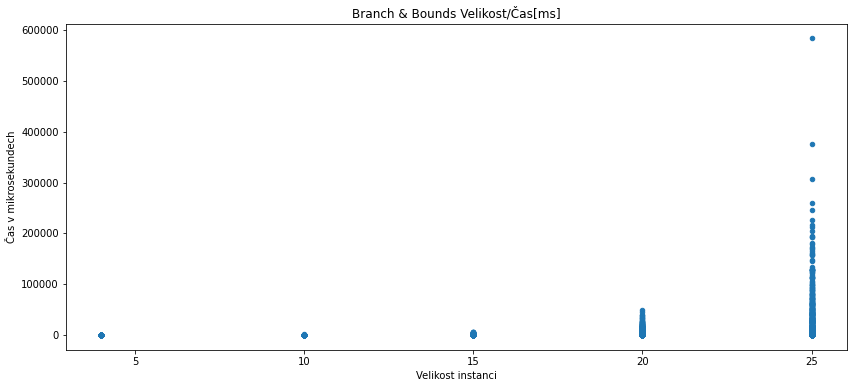

In [205]:
ax = algorithms_outputs['bb'].plot.scatter(
    x="INSTANCE_SIZE",
    y='TIME[ms]',
    figsize=(14, 6),
    colormap='jet',
    title='Branch & Bounds Velikost/Čas[ms]'
)

ax.set_xlabel("Velikost instanci")
ax.set_ylabel("Čas v mikrosekundech")

Jak již bylo už několikrát zmíněno dříve, složišť algoritmu je exponenciální. Na scatter grafu je vidět pár outlierů.

### 4.2 Dynamic programming (decomposition by weight)

Text(0, 0.5, 'Čas v mikrosekundech')

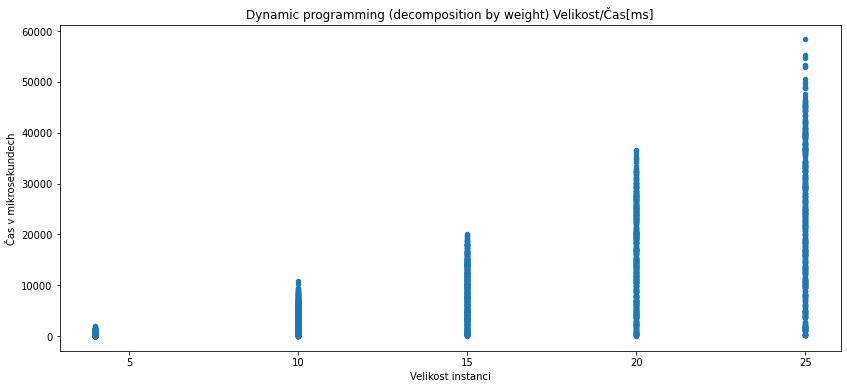

In [208]:
ax = algorithms_outputs['dp_dw'].plot.scatter(
    x="INSTANCE_SIZE",
    y='TIME[ms]',
    figsize=(14, 6),
    colormap='jet',
    title='Dynamic programming (decomposition by weight) Velikost/Čas[ms]'
)

ax.set_xlabel("Velikost instanci")
ax.set_ylabel("Čas v mikrosekundech")

Žádnou závislost na grafu není vidět, neboť jak již bylo zmíněno, závislost je v tomto případě na velikosti(nosnost/maximální váha) batohu.

### 4.3 Dynamic programming (decomposition by price)

Text(0, 0.5, 'Čas v mikrosekundech')

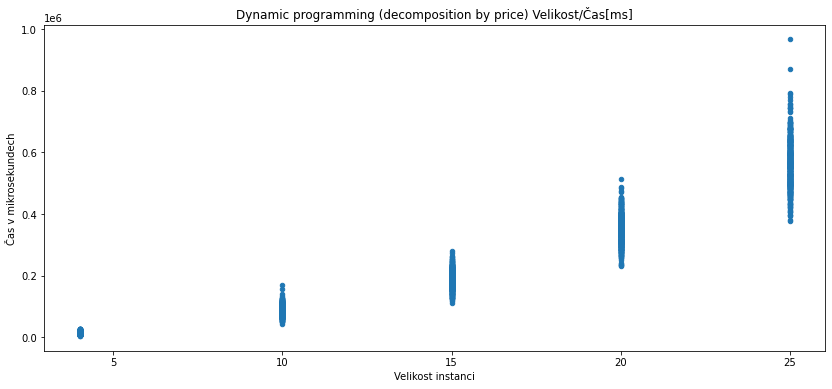

In [210]:
ax = algorithms_outputs['dp_dp'].plot.scatter(
    x="INSTANCE_SIZE",
    y='TIME[ms]',
    figsize=(14, 6),
    colormap='jet',
    title='Dynamic programming (decomposition by price) Velikost/Čas[ms]'
)

ax.set_xlabel("Velikost instanci")
ax.set_ylabel("Čas v mikrosekundech")

Zase nejde 100% určit závislost z nakresleného grafu, neboť cena není zobrazena na grafu.

### 4.4 Greedy

Text(0, 0.5, 'Čas v mikrosekundech')

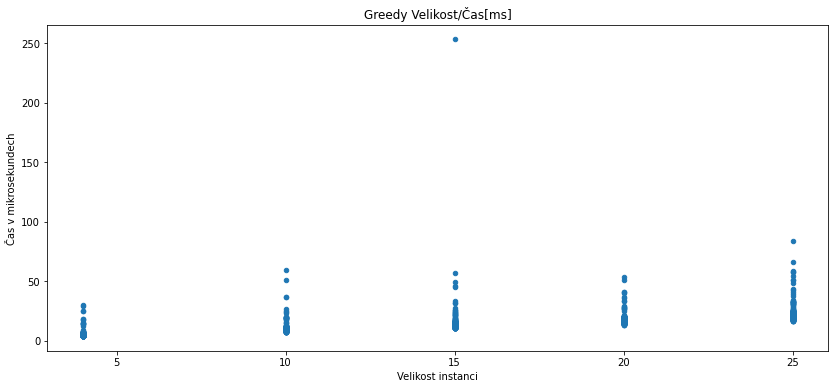

In [212]:
ax = algorithms_outputs['greedy'].plot.scatter(
    x="INSTANCE_SIZE",
    y='TIME[ms]',
    figsize=(14, 6),
    colormap='jet',
    title='Greedy Velikost/Čas[ms]'
)

ax.set_xlabel("Velikost instanci")
ax.set_ylabel("Čas v mikrosekundech")

Z tohoto grafu je 100% vidět, že závislost je lineární.

### 4.5 Redux

Text(0, 0.5, 'Čas v mikrosekundech')

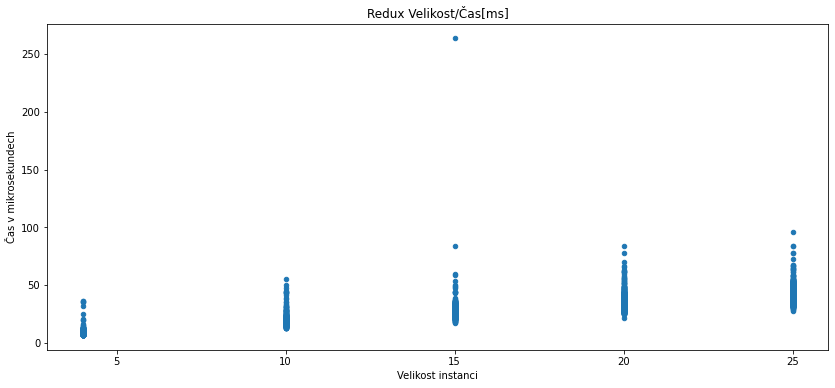

In [214]:
ax = algorithms_outputs['redux'].plot.scatter(
    x="INSTANCE_SIZE",
    y='TIME[ms]',
    figsize=(14, 6),
    colormap='jet',
    title='Redux Velikost/Čas[ms]'
)

ax.set_xlabel("Velikost instanci")
ax.set_ylabel("Čas v mikrosekundech")

To samé, co i u předchozího **Greedy** algoritmu, závislost je lineární.

### 4.5 FPTAS

Text(0, 0.5, 'Čas v mikrosekundech')

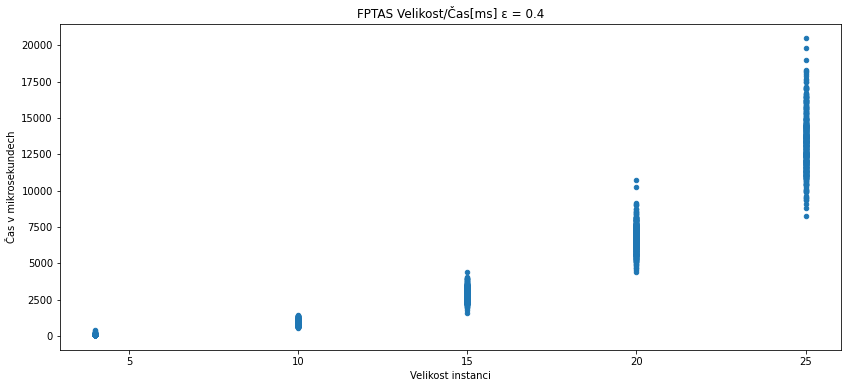

In [221]:
# only for accuracy=0.4
ax = algorithms_outputs['fptas'].loc[algorithms_outputs['fptas']['ACCURACY_VALUE'] == 0.4].plot.scatter(
    x="INSTANCE_SIZE",
    y='TIME[ms]',
    figsize=(14, 6),
    colormap='jet',
    title='FPTAS Velikost/Čas[ms] ε = 0.4'
)

ax.set_xlabel("Velikost instanci")
ax.set_ylabel("Čas v mikrosekundech")

To samé, co i u **Dynamic Programming** s dekompozici podle ceny (neboť je vlastně nadstavba nad tím původním algoritmem).

## 5. Grafy: pozorování chyby

### 5.1 Greedy & Redux : závislosti relativní chyby na velikosti instance u obou heuristik

Text(0, 0.5, 'Relativní chyba')

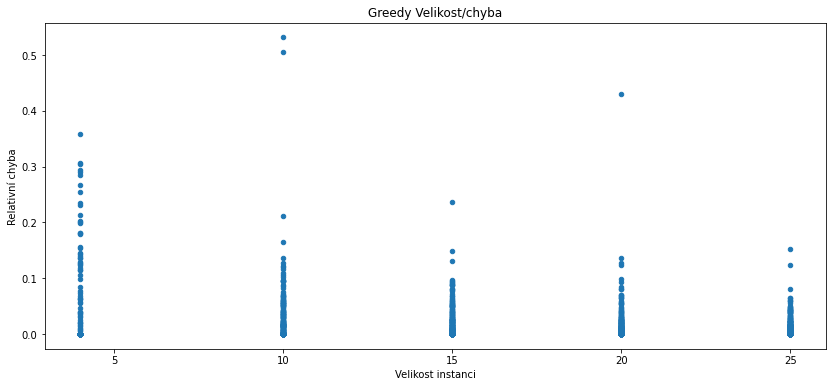

In [236]:
ax = algorithms_outputs['greedy'].plot.scatter(
    x="INSTANCE_SIZE",
    y='ERROR',
    figsize=(14, 6),
    colormap='jet',
    title='Greedy Velikost/chyba'
)

ax.set_xlabel("Velikost instanci")
ax.set_ylabel("Relativní chyba")

Text(0, 0.5, 'Relativní chyba')

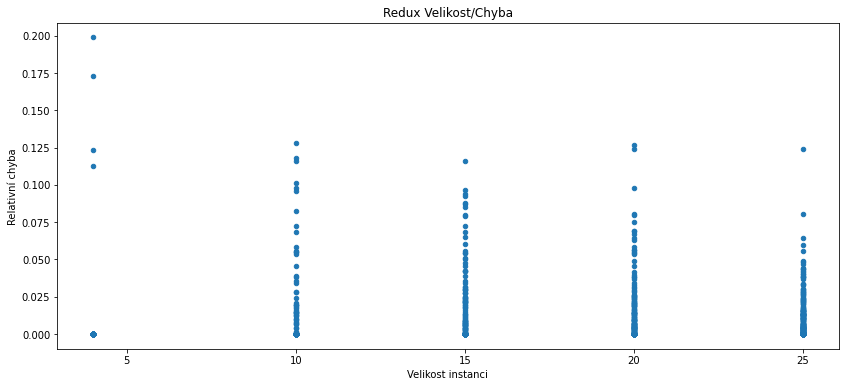

In [235]:
ax = algorithms_outputs['redux'].plot.scatter(
    x="INSTANCE_SIZE",
    y='ERROR',
    figsize=(14, 6),
    colormap='jet',
    title='Redux Velikost/Chyba'
)

ax.set_xlabel("Velikost instanci")
ax.set_ylabel("Relativní chyba")

Jediné, co jde říct, a co platí pro obě dvě heruistiky, tak že relativní chyba se zmenšuje pro instanci větší velikosti. To jest, je závislost mezi počtem věci (velikost prostoru) a relativní chybou. Stejne je videt nekolik outlierů.

### 5.2 FPTAS : závislost chyby a výpočetního času algoritmu na zvolené přesnosti, srovnání maximální naměřené chyby s teoreticky předpokládanou

===================================  FPTAS Přesnost/chyba ===================================


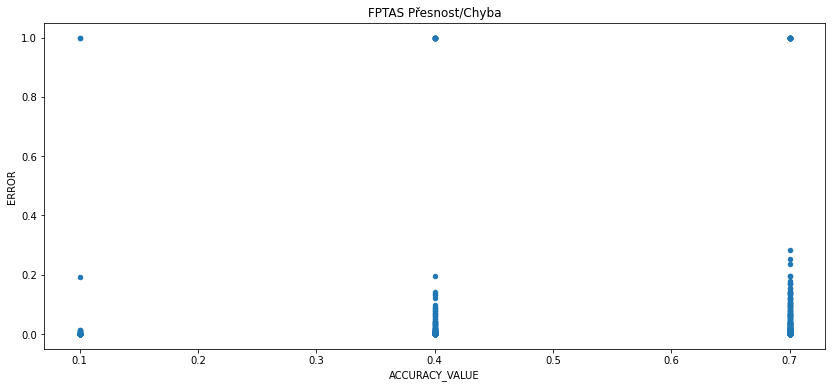

In [239]:
print("="*35, " FPTAS Přesnost/chyba", "="*35)
ax = algorithms_outputs['fptas'].plot.scatter(
    x="ACCURACY_VALUE",
    y='ERROR',
    figsize=(14, 6),
    colormap='jet',
    title='FPTAS Přesnost/Chyba'
)

Při rostoucí přesností **ε**, taky narůstá velikost relativní chyby.

===================================  FPTAS Velikost/chyba, pro ε = 0.1, 0.4, 0.7 ===================================


Text(0, 0.5, 'Relativní chyba')

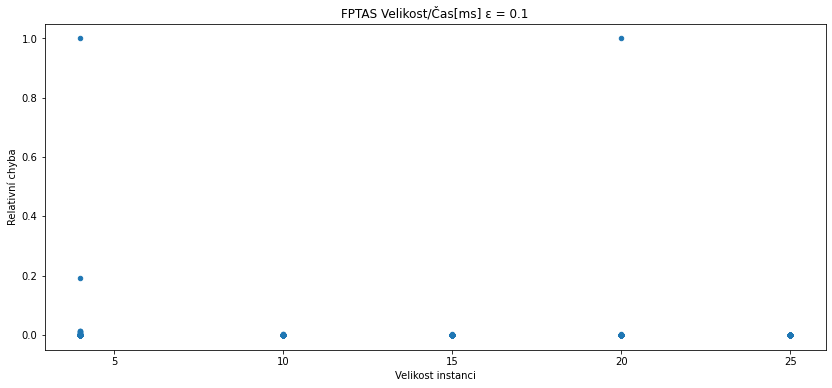

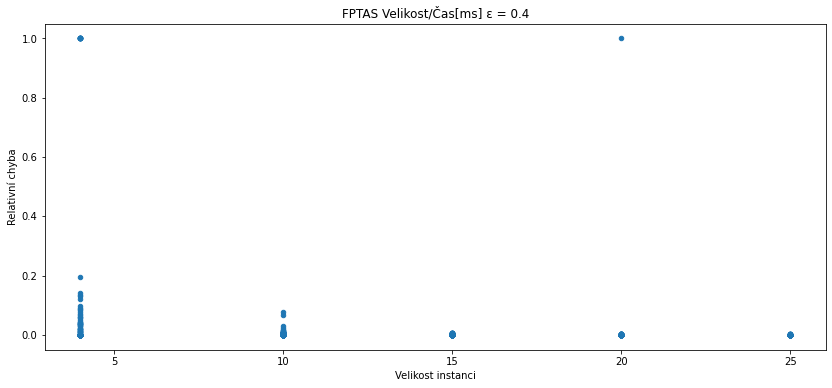

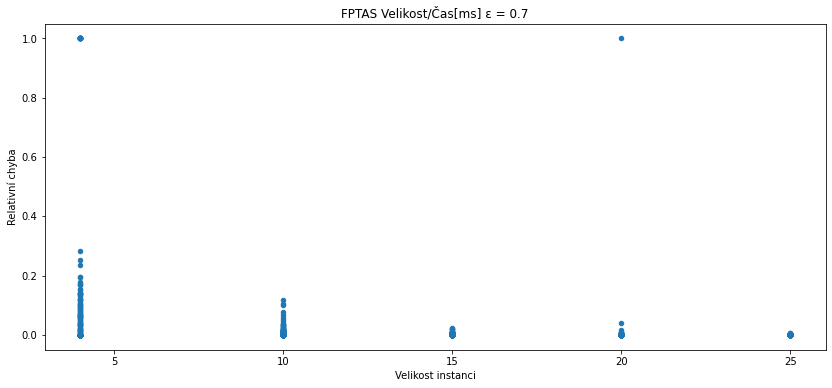

In [234]:
print("="*35, " FPTAS Velikost/chyba, pro ε = 0.1, 0.4, 0.7", "="*35)

# ε=0.1
ax = algorithms_outputs['fptas'].loc[algorithms_outputs['fptas']['ACCURACY_VALUE'] == 0.1].plot.scatter(
    x="INSTANCE_SIZE",
    y='ERROR',
    figsize=(14, 6),
    colormap='jet',
    title='FPTAS Velikost/Čas[ms] ε = 0.1'
)

ax.set_xlabel("Velikost instanci")
ax.set_ylabel("Relativní chyba")


# ε=0.4
ax = algorithms_outputs['fptas'].loc[algorithms_outputs['fptas']['ACCURACY_VALUE'] == 0.4].plot.scatter(
    x="INSTANCE_SIZE",
    y='ERROR',
    figsize=(14, 6),
    colormap='jet',
    title='FPTAS Velikost/Čas[ms] ε = 0.4'
)

ax.set_xlabel("Velikost instanci")
ax.set_ylabel("Relativní chyba")


# ε=0.7
ax = algorithms_outputs['fptas'].loc[algorithms_outputs['fptas']['ACCURACY_VALUE'] == 0.7].plot.scatter(
    x="INSTANCE_SIZE",
    y='ERROR',
    figsize=(14, 6),
    colormap='jet',
    title='FPTAS Velikost/Čas[ms] ε = 0.7'
)

ax.set_xlabel("Velikost instanci")
ax.set_ylabel("Relativní chyba")

Pro každou zvolenou přesnost je vidět zavilost mezi velikost relativní chyby a velikosti instanci. Čím větší velikost instanci, tím menší je relativní chyba.

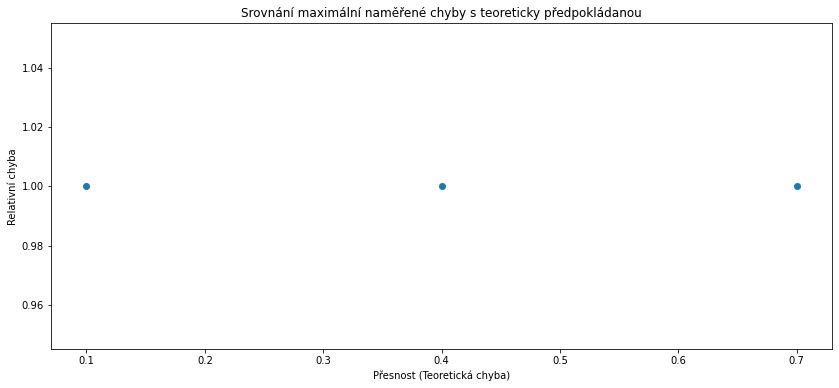

In [258]:
x = np.array([
    0.1, 0.4, 0.7
])
y = np.array([
    algorithms_outputs['fptas'].loc[algorithms_outputs['fptas']['ACCURACY_VALUE'] == 0.1]['ERROR'].max(),
    algorithms_outputs['fptas'].loc[algorithms_outputs['fptas']['ACCURACY_VALUE'] == 0.4]['ERROR'].max(),
    algorithms_outputs['fptas'].loc[algorithms_outputs['fptas']['ACCURACY_VALUE'] == 0.7]['ERROR'].max(),
])

plt.scatter(x, y)
plt.title("Srovnání maximální naměřené chyby s teoreticky předpokládanou")
plt.xlabel("Přesnost (Teoretická chyba)")
plt.ylabel("Relativní chyba")
plt.gcf().set_size_inches((14, 6))   
plt.show()

Pro každou z nastavených přesností, velikost relativní chyba je větší, než prenost(/teoretická chyba). To je spíš kluli přítomnosti outlierů v datech. Proto zkusíme ještě vyčistit data od outlierů.

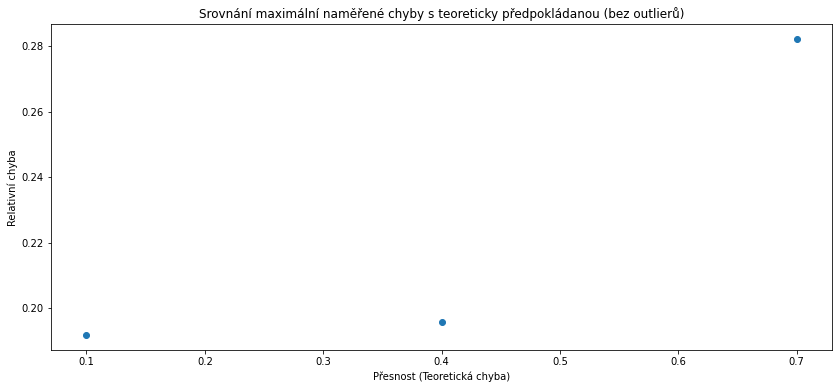

In [257]:
filtered_out_outliers_fptas = algorithms_outputs['fptas'][algorithms_outputs['fptas']['ERROR'] < 0.95]

x = np.array([
    0.1, 0.4, 0.7
])
y = np.array([
    filtered_out_outliers_fptas.loc[filtered_out_outliers_fptas['ACCURACY_VALUE'] == 0.1]['ERROR'].max(),
    filtered_out_outliers_fptas.loc[filtered_out_outliers_fptas['ACCURACY_VALUE'] == 0.4]['ERROR'].max(),
    filtered_out_outliers_fptas.loc[filtered_out_outliers_fptas['ACCURACY_VALUE'] == 0.7]['ERROR'].max(),
])

plt.scatter(x, y)
plt.title("Srovnání maximální naměřené chyby s teoreticky předpokládanou (bez outlierů)")
plt.xlabel("Přesnost (Teoretická chyba)")
plt.ylabel("Relativní chyba")
plt.gcf().set_size_inches((14, 6))   
plt.show()

Po vyčištění outlieru je vidět, že maximální relativní chyba nikdy nepřesahuje přesnost(/teoretickou chybu).

## 6. Závěr

Během této práci bylo implementováno spoustu nových algoritmu a prozkoumáno nových přístupu k řešení problémů bathou. Taky jsem seznámil s pojemem relativní chyby u heruistickych algoritmu. Stejně tak jsem se naučil takovým optimalizačním trikům, jak **Redux** nadstavba nad jednoduchým **Greedy** algoritmem, která docela silné znizuje relativní chybu, a **FPTAS** nadstavba nad **Dynamic Programming**, která docela zrychluje původní algorimus, ale s tím přináší relativní chybu.

**Dynamic Programming** s dekompozici podle váhy a **Branch & Bounds** se ukázaly jako nejrychlejší algoritmy, které navíc vždy dokážou získat optimální nejlepší řešení.